In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve

Load a sample grayscale image

In [3]:
image=np.random.rand(10,10)   #creates a sample grayscale image

print(image)

[[9.84617319e-01 2.27768504e-01 9.43602168e-01 8.73775099e-01
  4.97854431e-01 3.98575478e-01 3.68465496e-01 6.23132218e-01
  3.25576742e-01 8.15199041e-01]
 [6.38053730e-01 5.16369944e-01 1.07538231e-01 9.93480522e-01
  4.73707433e-01 9.33674220e-01 6.14549619e-01 2.60777631e-02
  7.05693643e-01 7.76360579e-01]
 [7.27189654e-02 5.56662984e-01 4.50381149e-01 5.10169553e-01
  2.05095048e-01 5.20298476e-01 5.38711640e-01 6.20602843e-01
  5.38083612e-02 3.12475995e-01]
 [6.45631886e-01 5.34778267e-01 7.55889892e-01 3.64366590e-01
  7.34086167e-01 7.72945701e-01 9.10183236e-03 1.42679531e-01
  7.61838366e-01 2.97251859e-01]
 [5.76257373e-01 6.91952033e-02 3.34697457e-01 9.41761495e-01
  2.73192423e-01 7.56430800e-01 2.51720806e-01 7.26631593e-04
  8.28589793e-01 6.44526470e-01]
 [3.40979376e-01 7.39142775e-01 6.37823434e-01 4.57071997e-01
  4.59289264e-01 3.45995910e-01 5.23715580e-01 9.27624806e-01
  2.93507051e-01 9.52106757e-01]
 [6.52094378e-01 2.89394080e-01 3.55416279e-02 1.59353581e

Define convolution filters(kernels)

In [4]:
edge_detection_kernel=np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1]
])

blur_kernel=np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])/9    #normalizing for averaging


sharpen_kernel=np.array([
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]
])

Apply convolution

In [5]:
edge_detected_image=convolve(image,edge_detection_kernel)
blurred_image=convolve(image,blur_kernel)
sharpened_image=convolve(image,sharpen_kernel)

Visualize original and filtered image

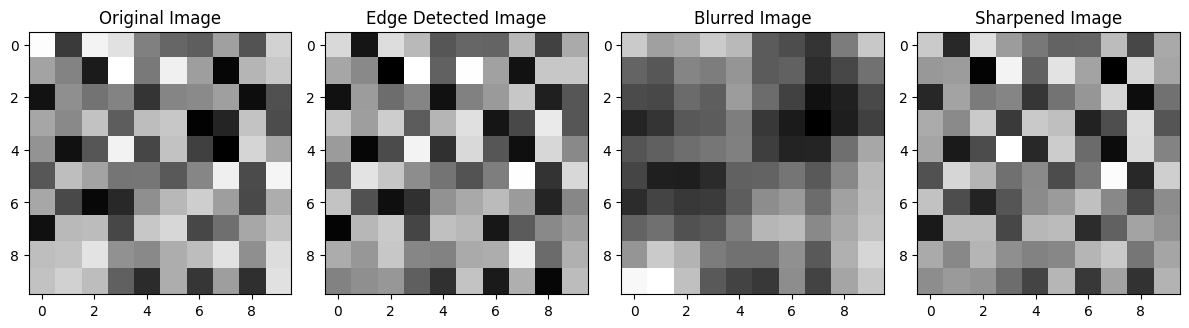

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))   #1row, 4 columns

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(edge_detected_image, cmap='gray')
axes[1].set_title('Edge Detected Image')

axes[2].imshow(blurred_image, cmap='gray')
axes[2].set_title('Blurred Image')

axes[3].imshow(sharpened_image, cmap='gray')
axes[3].set_title('Sharpened Image')

plt.tight_layout()
plt.show()


Implement Convolution using TensorFlow

In [8]:
import tensorflow as tf

In [19]:
#create a sample input tensor (batch_size, height, width, channels)
image_tensor=tf.random.normal([1, 10, 10, 1])

#define a convolutional layer
conv_layer=tf.keras.layers.Conv2D(filters=1,
                                  kernel_size=(3,3),
                                  padding='same',
                                  activation='relu')

#apply convolution
output_tensor=conv_layer(image_tensor)


print(f"Original Shape:{image_tensor.shape}")
print(f"Output Shape:{output_tensor.shape}")

Original Shape:(1, 10, 10, 1)
Output Shape:(1, 10, 10, 1)


Implement Convolution using PyTorch

In [11]:
import torch
import torch.nn as nn

In [20]:
#create a sample input tensor (batch_size,channels, height, width)
image_tensor_pt=torch.randn(1,1,10,10)

#define a convolutional layer
conv_layer=nn.Conv2d(in_channels=1,
                     out_channels=1,
                     kernel_size=3,
                     stride=1,
                     padding='same')

#apply convolution
output_tensor_pt=conv_layer(image_tensor_pt)

print(f"Original Shape:{image_tensor_pt.shape}")
print(f"Output Shape:{output_tensor_pt.shape}")


Original Shape:torch.Size([1, 1, 10, 10])
Output Shape:torch.Size([1, 1, 10, 10])


TensorFlow example

In [21]:
#define a convolutional layer
conv_layer_large=tf.keras.layers.Conv2D(filters=1,
                                  kernel_size=(5,5),
                                  strides=(1,1),
                                  padding='same',
                                  activation='relu')

output_tensor_large=conv_layer_large(image_tensor)

print(f"Original Shape:{image_tensor.shape}")
print(f"Output Shape:{output_tensor_large.shape}")

Original Shape:(1, 10, 10, 1)
Output Shape:(1, 10, 10, 1)


PyTorch example

In [22]:
conv_layer_large_pt=nn.Conv2d(in_channels=1,
                     out_channels=1,
                     kernel_size=3,
                     stride=2,
                     padding=1)

output_tensor_large_pt=conv_layer_large_pt(image_tensor_pt)

print(f"Original Shape:{image_tensor_pt.shape}")
print(f"Output Shape:{output_tensor_large_pt.shape}")
#

Original Shape:torch.Size([1, 1, 10, 10])
Output Shape:torch.Size([1, 1, 5, 5])
